# Loading, preparing, and visualizing data

## Import MNIST dataset from Keras

In [1]:
from keras.datasets import mnist

## Load the datasets into Python array

In [2]:
(modeling_2D_X, modeling_y), (validate_2D_X, validate_y) = mnist.load_data()

## Convert images to a NumPy array

In [3]:
import numpy as np

modeling_X = np.array([np.array(image).ravel() for image in modeling_2D_X])
validate_X = np.array([np.array(image).ravel() for image in validate_2D_X])

## Split the dataset into training, testing, and validating datasets

In [4]:
train_X, train_y, test_X, test_y = modeling_X[:50000], modeling_y[:50000], modeling_X[50000:], modeling_y[50000:]
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)
print(validate_X.shape)
print(validate_y.shape)

(50000, 784)
(50000,)
(10000, 784)
(10000,)
(10000, 784)
(10000,)


## Visualize the images in the dataset

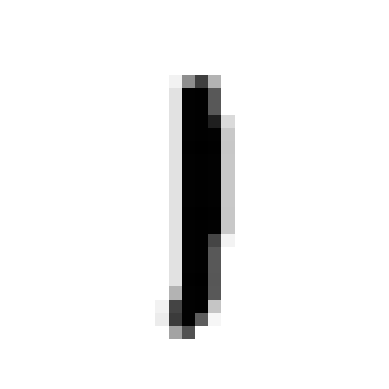

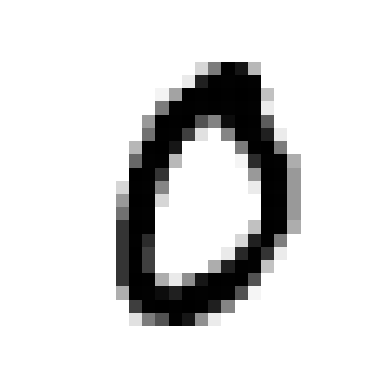

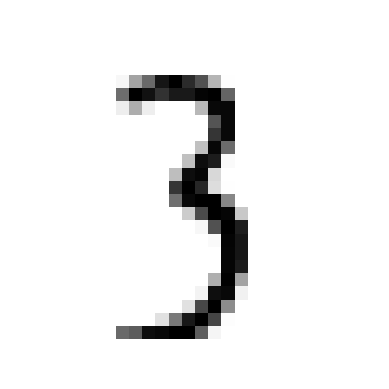

In [5]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = train_X[34782]
plot_digit(some_digit)
plt.show()

some_digit = test_X[4783]
plot_digit(some_digit)
plt.show()

some_digit = validate_X[9283]
plot_digit(some_digit)
plt.show()

# Random forest classifier

## Training

In [6]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=100,
                                                  criterion='gini', 
                                                  n_jobs=-1,  
                                                  random_state=30)
random_forest_classifier.fit(train_X, train_y)

RandomForestClassifier(n_jobs=-1, random_state=30)

## Running the model on the test dataset

0.9719


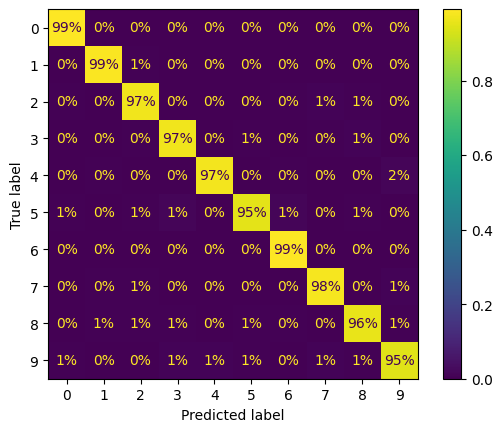

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

print(random_forest_classifier.score(test_X, test_y))

predicted_y = random_forest_classifier.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

# Extra-trees classifier

## Training

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

extra_trees_classifier = ExtraTreesClassifier(n_estimators=100,
                                           criterion='gini', 
                                           n_jobs=-1,
                                           random_state=40)
extra_trees_classifier.fit(train_X, train_y)

ExtraTreesClassifier(n_jobs=-1, random_state=40)

## Running the model on the test dataset

0.9742


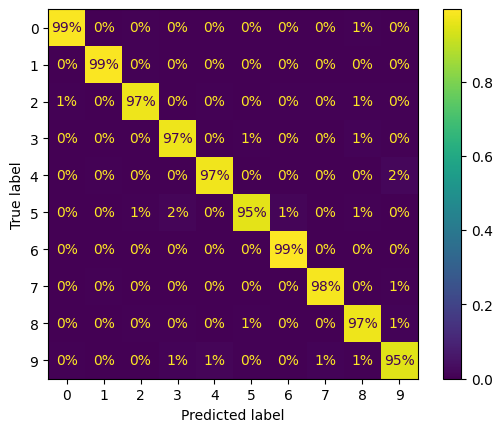

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

print(extra_trees_classifier.score(test_X, test_y))

predicted_y = extra_trees_classifier.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

# Logistical regression model

## Training

In [10]:
from sklearn.linear_model import LogisticRegression

logistical_regressor = LogisticRegression(penalty='l1',
                                          C=0.01,
                                          random_state=50,
                                          max_iter=10000,
                                          solver='saga',
                                          tol=0.01,
                                          n_jobs=-1)
logistical_regressor.fit(train_X, train_y)

LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=50, solver='saga', tol=0.01)

## Running the model on the test dataset

0.9294


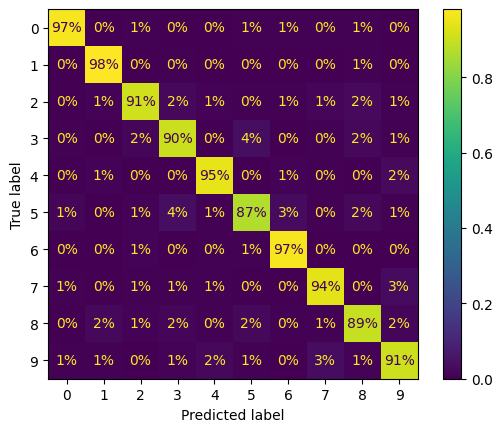

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

print(logistical_regressor.score(test_X, test_y))

predicted_y = logistical_regressor.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

# Decision tree

## Training

In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion='gini',
                                                  min_samples_split=5,
                                                  random_state=60)
decision_tree_classifier.fit(train_X, train_y)

DecisionTreeClassifier(min_samples_split=5, random_state=60)

## Running the model on the test dataset

0.8826


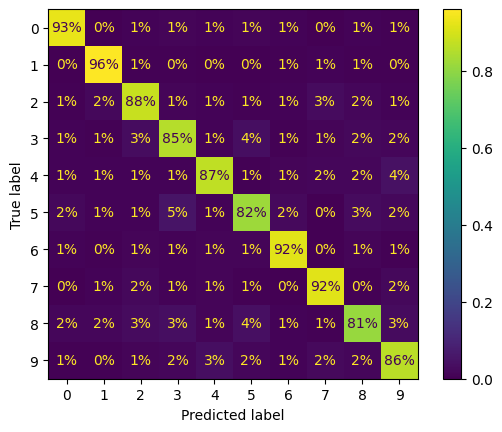

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

print(decision_tree_classifier.score(test_X, test_y))

predicted_y = decision_tree_classifier.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

# Stochastic gradient descent (SGD) classifier

## Preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X.astype("float64"))

## Training

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=70,
                               n_jobs=-1)
sgd_classifier.fit(train_X, train_y)

SGDClassifier(n_jobs=-1, random_state=70)

## Cross-evaluation

In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score

sgd_classifier_accuracy = cross_val_score(sgd_classifier, train_X, train_y, cv=5, scoring="accuracy")

pd.Series(sgd_classifier_accuracy).describe()

count    5.000000
mean     0.857940
std      0.021169
min      0.828700
25%      0.845100
50%      0.864400
75%      0.868800
max      0.882700
dtype: float64

## Running the model on the test dataset

0.8797


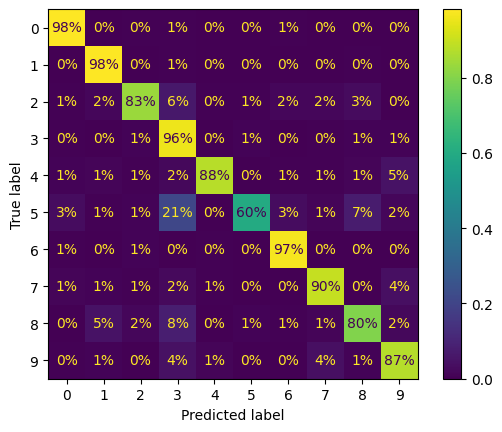

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

print(sgd_classifier.score(test_X, test_y))

predicted_y = sgd_classifier.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

# Ensemble (Using all 5 models)

## Training

In [18]:
from sklearn.ensemble import VotingClassifier

hard_vote_classifier_5 = VotingClassifier(
    estimators=[
        ('random_forest_classifier', random_forest_classifier),
        ('extra_trees_classifier', extra_trees_classifier),
        ('logistical_regressor', logistical_regressor),
        ('decision_tree_classifier', decision_tree_classifier),
        ('sgd_classifier', sgd_classifier)],
    voting='hard',
    n_jobs=-1,
)

hard_vote_classifier_5.fit(train_X, train_y)

VotingClassifier(estimators=[('random_forest_classifier',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=30)),
                             ('extra_trees_classifier',
                              ExtraTreesClassifier(n_jobs=-1, random_state=40)),
                             ('logistical_regressor',
                              LogisticRegression(C=0.01, max_iter=10000,
                                                 n_jobs=-1, penalty='l1',
                                                 random_state=50, solver='saga',
                                                 tol=0.01)),
                             ('decision_tree_classifier',
                              DecisionTreeClassifier(min_samples_split=5,
                                                     random_state=60)),
                             ('sgd_classifier',
                              SGDClassifier(n_jobs=-1, random_state=70))],
                 n_jobs=-1)

## Running the model on the test dataset

0.9667


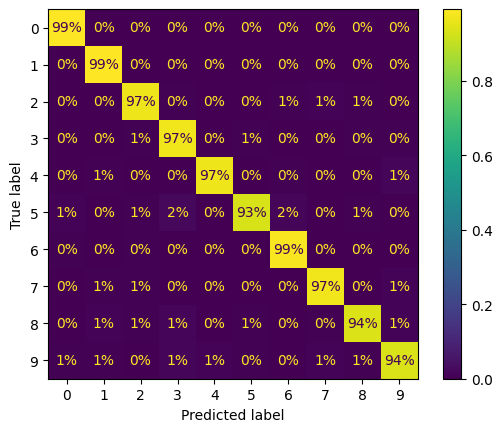

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

print(hard_vote_classifier_5.score(test_X, test_y))

predicted_y = hard_vote_classifier_5.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

## Compare the ensemble model with individual models

In [29]:
print("Individual estimator's accuracy:")
for estimator in hard_vote_classifier_5.estimators_:
    print("\tAccuracy of {}: {}".format(estimator, estimator.score(test_X, test_y)))
print("\nEnsemble-5 model's accuracy: {}".format(hard_vote_classifier_5.score(test_X, test_y)))

Individual estimator's accuracy:
	Accuracy of RandomForestClassifier(n_jobs=-1, random_state=30): 0.9719
	Accuracy of ExtraTreesClassifier(n_jobs=-1, random_state=40): 0.9742
	Accuracy of LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=50, solver='saga', tol=0.01): 0.9294
	Accuracy of DecisionTreeClassifier(min_samples_split=5, random_state=60): 0.8826
	Accuracy of SGDClassifier(n_jobs=-1, random_state=70): 0.8797

Ensemble-5 model's accuracy: 0.9667


# Ensemble (Using only 3 best models)

## Training

In [30]:
from sklearn.ensemble import VotingClassifier

hard_vote_classifier_3 = VotingClassifier(
    estimators=[
        ('random_forest_classifier', random_forest_classifier),
        ('extra_trees_classifier', extra_trees_classifier),
        ('logistical_regressor', logistical_regressor)],
    voting='hard',
    n_jobs=-1,
)

hard_vote_classifier_3.fit(train_X, train_y)

VotingClassifier(estimators=[('random_forest_classifier',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=30)),
                             ('extra_trees_classifier',
                              ExtraTreesClassifier(n_jobs=-1, random_state=40)),
                             ('logistical_regressor',
                              LogisticRegression(C=0.01, max_iter=10000,
                                                 n_jobs=-1, penalty='l1',
                                                 random_state=50, solver='saga',
                                                 tol=0.01))],
                 n_jobs=-1)

## Running the model on the test dataset

0.9723


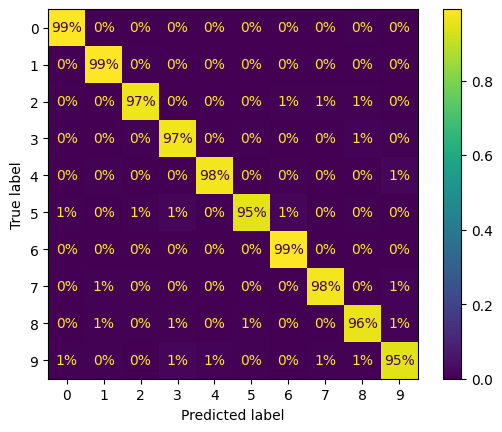

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay

print(hard_vote_classifier_3.score(test_X, test_y))

predicted_y = hard_vote_classifier_3.predict(test_X)

ConfusionMatrixDisplay.from_predictions(test_y, predicted_y, normalize="true", values_format=".0%")
plt.show()

## Compare the ensemble model with individual models

In [32]:
print("Individual estimator's accuracy:")
for estimator in hard_vote_classifier_3.estimators_:
    print("\tAccuracy of {}: {}".format(estimator, estimator.score(test_X, test_y)))
print("\nEnsemble-5 model's accuracy: {}".format(hard_vote_classifier_3.score(test_X, test_y)))

Individual estimator's accuracy:
	Accuracy of RandomForestClassifier(n_jobs=-1, random_state=30): 0.9719
	Accuracy of ExtraTreesClassifier(n_jobs=-1, random_state=40): 0.9742
	Accuracy of LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=50, solver='saga', tol=0.01): 0.9294

Ensemble-5 model's accuracy: 0.9723


# Applying the ensemble model on the validation dataset

0.9686


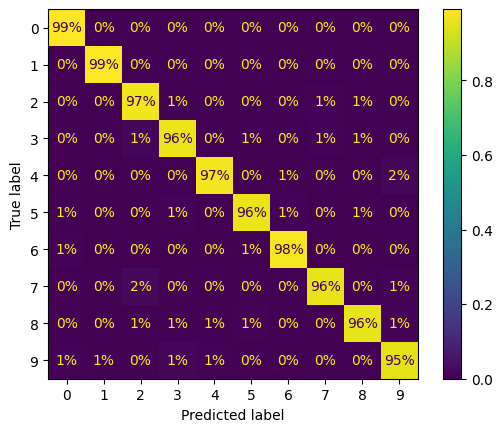

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

print(hard_vote_classifier_3.score(validate_X, validate_y))

hard_vote_classifier_prediction = hard_vote_classifier_3.predict(validate_X)
ConfusionMatrixDisplay.from_predictions(validate_y, hard_vote_classifier_prediction, normalize="true", values_format=".0%")
plt.show()

# Saving the model

In [34]:
import joblib
joblib.dump(hard_vote_classifier_3, "hard_vote_classifier_3_model.pkl")

['hard_vote_classifier_3_model.pkl']

# Acknowledgment